# EXPERIMENT SETUP #5 - Training methodology

So far we have used test train split technique to train our model and we have seen that out data is overfitting in most of the previous experiment setups. To combat that kfold training technique will also be tested out to see what we can achieve with our model

## Load Data

In [ ]:
!pip install transformers nltk

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import tensorflow as tf
from google.colab import drive
import os
import bert
import trainer
import utils
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import json

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
drive.mount('/gdrive')
os.listdir('/gdrive/MyDrive/data')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


['test.csv',
 'sample_submission.csv',
 'train.csv',
 'saved_models',
 'training_resultsSimpleBertForSequenceClassification.json',
 'training_resultsModifiedBertForSequenceClassification.json',
 'utils.py',
 'trainer.py',
 'bert.py',
 'training_results_ModifiedBertForSequenceClassification.json',
 'training_results_ModifiedBertForSequenceClassification_1.json',
 'training_results_BertToSingleLayerNeuralNetwork_1.json',
 'training_results_SimpleBertForSequenceClassification_1.json',
 'preprocessing_exp',
 'tokenizer_exp',
 'val.csv',
 'data.csv',
 'hyperparameter_exp',
 'training_exp']

In [ ]:
dataset_location = '/gdrive/MyDrive/data'
path = "/gdrive/MyDrive/data/training_exp"
use_tpu = True
train = True

In [ ]:
if not os.path.exists(path):
    os.mkdir(path)

In [ ]:
dataset = pd.read_csv("{}/data.csv".format(dataset_location))
validation_dataset = pd.read_csv("{}/val.csv".format(dataset_location))

In [ ]:
dataset.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0
1,21,Deciphering noise amplification and reduction ...,The impact of random fluctuations on the dyn...,0,0,0,0,1,0
2,34,An Unsupervised Homogenization Pipeline for Cl...,Electronic health records (EHR) contain a la...,0,0,0,0,1,0
3,42,Are multi-factor Gaussian term structure model...,"In this paper, we empirically study models f...",0,0,0,0,0,1
4,56,Competing evolutionary paths in growing popula...,Investigating the emergence of a particular ...,0,0,0,0,1,0


In [ ]:
dataset["text"] = dataset["TITLE"] + " ." + dataset["ABSTRACT"]
validation_dataset["text"] = validation_dataset["TITLE"] + " ." + validation_dataset["ABSTRACT"]
dataset.head(1)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0,$\mathcal{R}_{0}$ fails to predict the outbrea...


In [ ]:
classes = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]

In [ ]:
Y = dataset[classes].values
Y_val = validation_dataset[classes].values

In [ ]:
if use_tpu:
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
    except ValueError:
        strategy = tf.distribute.get_strategy() # for CPU and single GPU
        print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.116.206.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.116.206.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Train

In [ ]:
class ModelConfig:
    max_length = 200
    bert_name = "bert-base-uncased"
    num_labels = 6
    optimizer = tf.keras.optimizers.Adam(0.00001)
    loss_function = "binary_crossentropy"
    metrics = ["accuracy"]


class TrainerConfig:
    test_size = 0.2
    fold_count = 8
    batch_size = 64
    epochs = 5

### Experiment #1 with test train split and 5 epochs

In [ ]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
version = "5_tt"
TrainerConfig.epochs = 5
if use_tpu:
    with strategy.scope():
        model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.TestTrainSplitTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history = trainer_methodology.train()
    training_history = utils.training_history_to_dict(training_history)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history = json.load(file)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5


250/250 [==============================] - ETA: 0s - loss: 0.2922 - accuracy: 0.6731WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


250/250 [==============================] - 162s 357ms/step - loss: 0.2919 - accuracy: 0.6733 - val_loss: 0.1785 - val_accuracy: 0.7509
Epoch 2/5
250/250 [==============================] - 34s 135ms/step - loss: 0.1688 - accuracy: 0.7726 - val_loss: 0.1674 - val_accuracy: 0.7632
Epoch 3/5
250/250 [==============================] - 34s 136ms/step - loss: 0.1492 - accuracy: 0.7906 - val_loss: 0.1681 - val_accuracy: 0.7377
Epoch 4/5
250/250 [==============================] - 34s 136ms/step - loss: 0.1339 - accuracy: 0.7928 - val_loss: 0.1706 - val_accuracy: 0.7610
Epoch 5/5
250/250 [==============================] - 34s 135ms/step - loss: 0.1165 - accuracy: 0.8085 - val_loss: 0.1816 - val_accuracy: 0.7557


### Experiment #1 with test train split and 10 epochs

In [ ]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
version = "10_tt"
TrainerConfig.epochs = 10
if use_tpu:
    with strategy.scope():
        model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.TestTrainSplitTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history = trainer_methodology.train()
    training_history = utils.training_history_to_dict(training_history)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history = json.load(file)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


250/250 [==============================] - ETA: 0s - loss: 0.2640 - accuracy: 0.6922WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


250/250 [==============================] - 164s 358ms/step - loss: 0.2637 - accuracy: 0.6924 - val_loss: 0.1698 - val_accuracy: 0.7372
Epoch 2/10
250/250 [==============================] - 34s 137ms/step - loss: 0.1560 - accuracy: 0.7821 - val_loss: 0.1631 - val_accuracy: 0.7710
Epoch 3/10
250/250 [==============================] - 34s 136ms/step - loss: 0.1289 - accuracy: 0.8021 - val_loss: 0.1646 - val_accuracy: 0.7845
Epoch 4/10
250/250 [==============================] - 34s 136ms/step - loss: 0.1099 - accuracy: 0.8212 - val_loss: 0.1786 - val_accuracy: 0.7492
Epoch 5/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0901 - accuracy: 0.8288 - val_loss: 0.1916 - val_accuracy: 0.7472
Epoch 6/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0698 - accuracy: 0.8431 - val_loss: 0.2231 - val_accuracy: 0.7660
Epoch 7/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0552 - accuracy: 0.8576 - val_loss: 0.2355 - val_accuracy: 0.

### Experiment #3 with KFold split with 4 folds 5 epochs each

In [ ]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
version = "4_kf"
TrainerConfig.epochs = 5
TrainerConfig.fold_count = 4
if use_tpu:
    with strategy.scope():
        model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.KFoldTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history = trainer_methodology.train()
    training_history = utils.training_history_to_dict(training_history)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history = json.load(file)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/5


235/235 [==============================] - ETA: 0s - loss: 0.3125 - accuracy: 0.6740WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


235/235 [==============================] - 163s 372ms/step - loss: 0.3121 - accuracy: 0.6743 - val_loss: 0.1820 - val_accuracy: 0.7545
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 0.1725 - accuracy: 0.7683 - val_loss: 0.1799 - val_accuracy: 0.7274
Epoch 3/5
235/235 [==============================] - 33s 141ms/step - loss: 0.1517 - accuracy: 0.7899 - val_loss: 0.1697 - val_accuracy: 0.7619
Epoch 4/5
235/235 [==============================] - 33s 140ms/step - loss: 0.1349 - accuracy: 0.8022 - val_loss: 0.1833 - val_accuracy: 0.7392
Epoch 5/5
235/235 [==============================] - 33s 139ms/step - loss: 0.1174 - accuracy: 0.8163 - val_loss: 0.1837 - val_accuracy: 0.7547
Epoch 1/5
235/235 [==============================] - 33s 140ms/step - loss: 0.1283 - accuracy: 0.8074 - val_loss: 0.0868 - val_accuracy: 0.8288
Epoch 2/5
235/235 [==============================] - 33s 141ms/step - loss: 0.1070 - accuracy: 0.8256 - val_loss: 0.0852 - val_accuracy: 0.8286
E

### Experiment #4 with KFold split with 8 folds 5 epochs each

In [ ]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
version = "8_kf"
TrainerConfig.epochs = 5
TrainerConfig.fold_count = 8
if use_tpu:
    with strategy.scope():
        model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.KFoldTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history = trainer_methodology.train()
    training_history = utils.training_history_to_dict(training_history)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history = json.load(file)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5


274/274 [==============================] - ETA: 0s - loss: 0.2397 - accuracy: 0.7156WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


274/274 [==============================] - 169s 334ms/step - loss: 0.2395 - accuracy: 0.7157 - val_loss: 0.1719 - val_accuracy: 0.7729
Epoch 2/5
274/274 [==============================] - 36s 132ms/step - loss: 0.1484 - accuracy: 0.7895 - val_loss: 0.1700 - val_accuracy: 0.7685
Epoch 3/5
274/274 [==============================] - 36s 133ms/step - loss: 0.1230 - accuracy: 0.8092 - val_loss: 0.1801 - val_accuracy: 0.7473
Epoch 4/5
274/274 [==============================] - 36s 133ms/step - loss: 0.1019 - accuracy: 0.8226 - val_loss: 0.1990 - val_accuracy: 0.7257
Epoch 5/5
274/274 [==============================] - 37s 134ms/step - loss: 0.0826 - accuracy: 0.8380 - val_loss: 0.2080 - val_accuracy: 0.7377
Epoch 1/5
274/274 [==============================] - 37s 134ms/step - loss: 0.0881 - accuracy: 0.8292 - val_loss: 0.0567 - val_accuracy: 0.8602
Epoch 2/5
274/274 [==============================] - 37s 134ms/step - loss: 0.0684 - accuracy: 0.8430 - val_loss: 0.0593 - val_accuracy: 0.8194
E

274/274 [==============================] - 42s 153ms/step - loss: 0.0089 - accuracy: 0.8736 - val_loss: 0.0022 - val_accuracy: 0.8381
Epoch 2/5
274/274 [==============================] - 36s 133ms/step - loss: 0.0067 - accuracy: 0.8718 - val_loss: 0.0017 - val_accuracy: 0.8546
Epoch 3/5
274/274 [==============================] - 36s 133ms/step - loss: 0.0062 - accuracy: 0.8765 - val_loss: 0.0020 - val_accuracy: 0.8458
Epoch 4/5
274/274 [==============================] - 36s 133ms/step - loss: 0.0056 - accuracy: 0.8727 - val_loss: 0.0021 - val_accuracy: 0.8313
Epoch 5/5
274/274 [==============================] - 36s 133ms/step - loss: 0.0056 - accuracy: 0.8720 - val_loss: 0.0013 - val_accuracy: 0.8289
Epoch 1/5
274/274 [==============================] - 36s 133ms/step - loss: 0.0057 - accuracy: 0.8687 - val_loss: 8.1843e-04 - val_accuracy: 0.8726
Epoch 2/5
274/274 [==============================] - 36s 133ms/step - loss: 0.0057 - accuracy: 0.8694 - val_loss: 8.6581e-04 - val_accuracy: 0

## Evaluate

In [ ]:
exp_names = ["5 Epoch TestTrain Split", "10 Epoch TestTrain Split", "4 fold KFold", "8 fold KFold"]

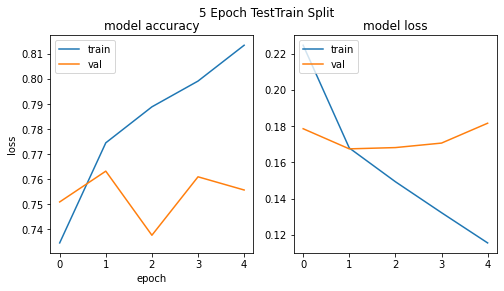

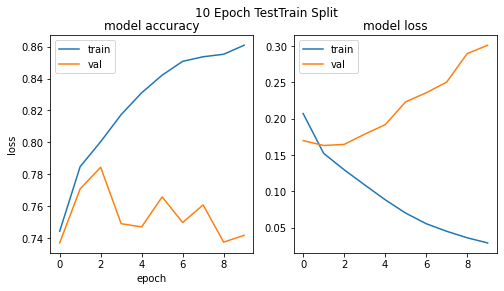

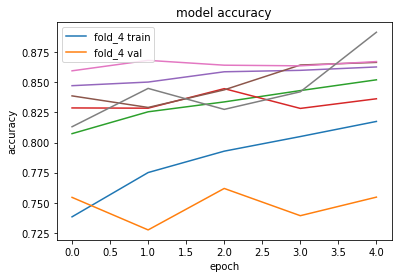

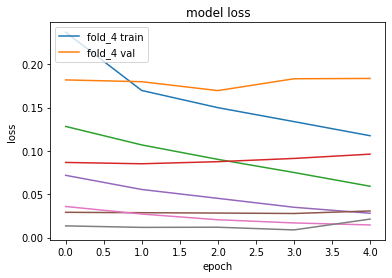

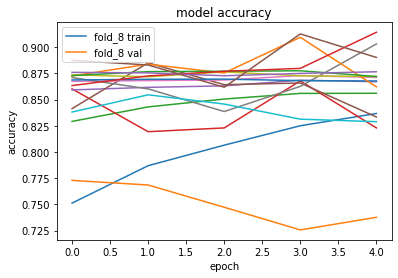

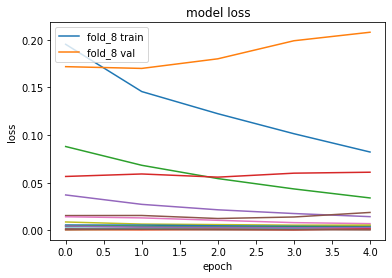

In [ ]:
model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
model.version = "5_tt"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[0])


model.version = "10_tt"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[1])


model.version = "4_kf"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[2])

model.version = "8_kf"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[3])

From the training history graph we can see that kfold has definitely performed better with fitting our model

In [ ]:
model = bert.BertToSingleLayerNeuralNetwork(config=ModelConfig)
model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "5_tt"
model.load(path)
tt_5_y_pred = model.predict(validation_dataset["text"])


model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "10_tt"
model.load(path)
tt_10_y_pred = model.predict(validation_dataset["text"])


model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "4_kf"
model.load(path)
kf_4_y_pred = model.predict(validation_dataset["text"])


model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "8_kf"
model.load(path)
kf_8_y_pred = model.predict(validation_dataset["text"])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
y_preds=[tt_5_y_pred, tt_10_y_pred, kf_4_y_pred, kf_8_y_pred]
Ys=[Y_val, Y_val, Y_val, Y_val]
classes=classes
threshold=0.5
model_names=exp_names

In [ ]:
utils.print_f1_scores(y_preds, Ys, classes, threshold, model_names)

F1-Score for is  5 Epoch TestTrain Split : [('Computer Science', 0.8011639185257031), ('Physics', 0.864321608040201), ('Mathematics', 0.7692307692307693), ('Statistics', 0.752851711026616), ('Quantitative Biology', 0.8079999999999998), ('Quantitative Finance', 0.9)]
F1-Score for is  10 Epoch TestTrain Split : [('Computer Science', 0.8213228035538006), ('Physics', 0.8641571194762684), ('Mathematics', 0.7890909090909092), ('Statistics', 0.8156565656565656), ('Quantitative Biology', 0.921832884097035), ('Quantitative Finance', 0.9475890985324946)]
F1-Score for is  4 fold KFold : [('Computer Science', 0.8582914572864322), ('Physics', 0.9015544041450777), ('Mathematics', 0.7967806841046278), ('Statistics', 0.8477690288713909), ('Quantitative Biology', 0.9838297872340425), ('Quantitative Finance', 0.9879518072289156)]
F1-Score for is  8 fold KFold : [('Computer Science', 0.8574380165289256), ('Physics', 0.9041095890410958), ('Mathematics', 0.8163265306122449), ('Statistics', 0.85786802030456

In [ ]:
utils.print_hamming_losses(y_preds, Ys, classes, threshold, model_names)

Hamming for 5 Epoch TestTrain Split  :  0.07807643079173524
Hamming for 10 Epoch TestTrain Split  :  0.05832876211373195
Hamming for 4 fold KFold  :  0.040226732492228925
Hamming for 8 fold KFold  :  0.03867251782775644


Confusion matrix for 5 Epoch TestTrain Split


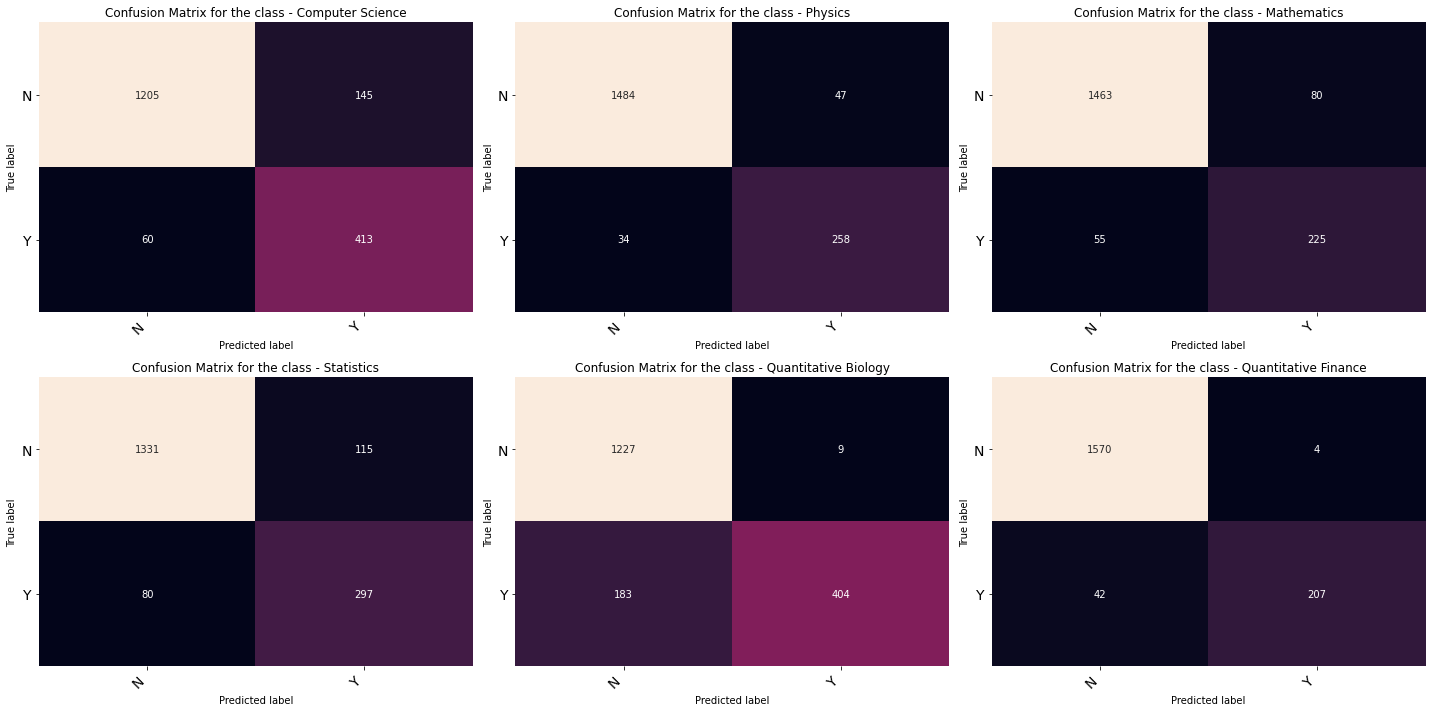

Confusion matrix for 10 Epoch TestTrain Split


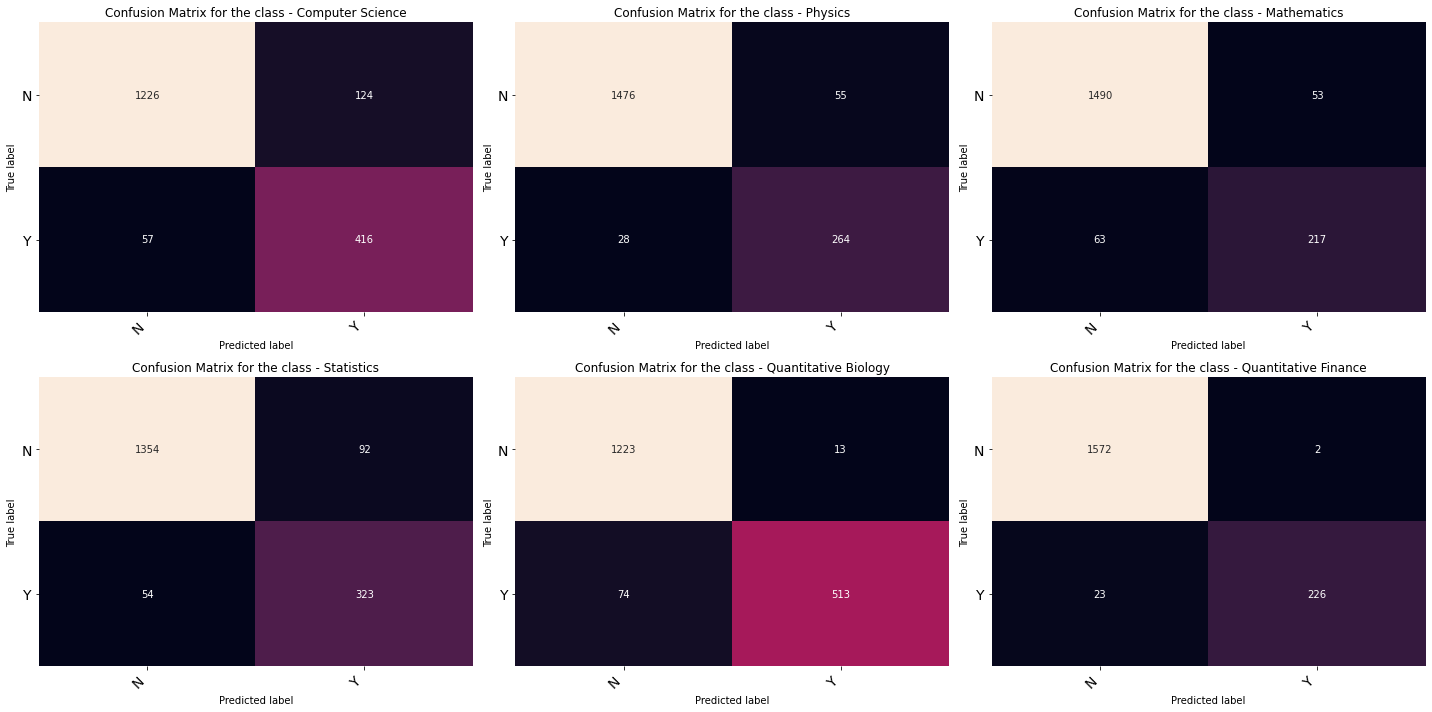

Confusion matrix for 4 fold KFold


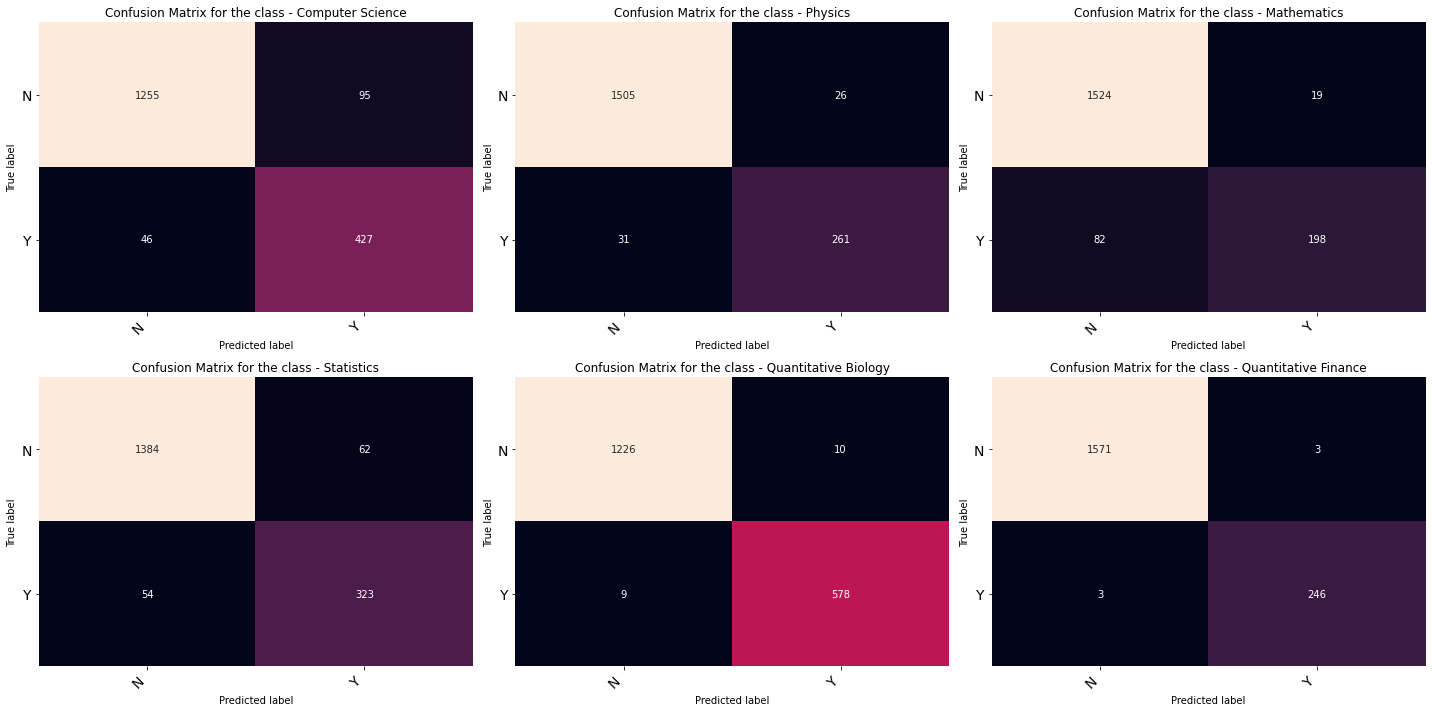

Confusion matrix for 8 fold KFold


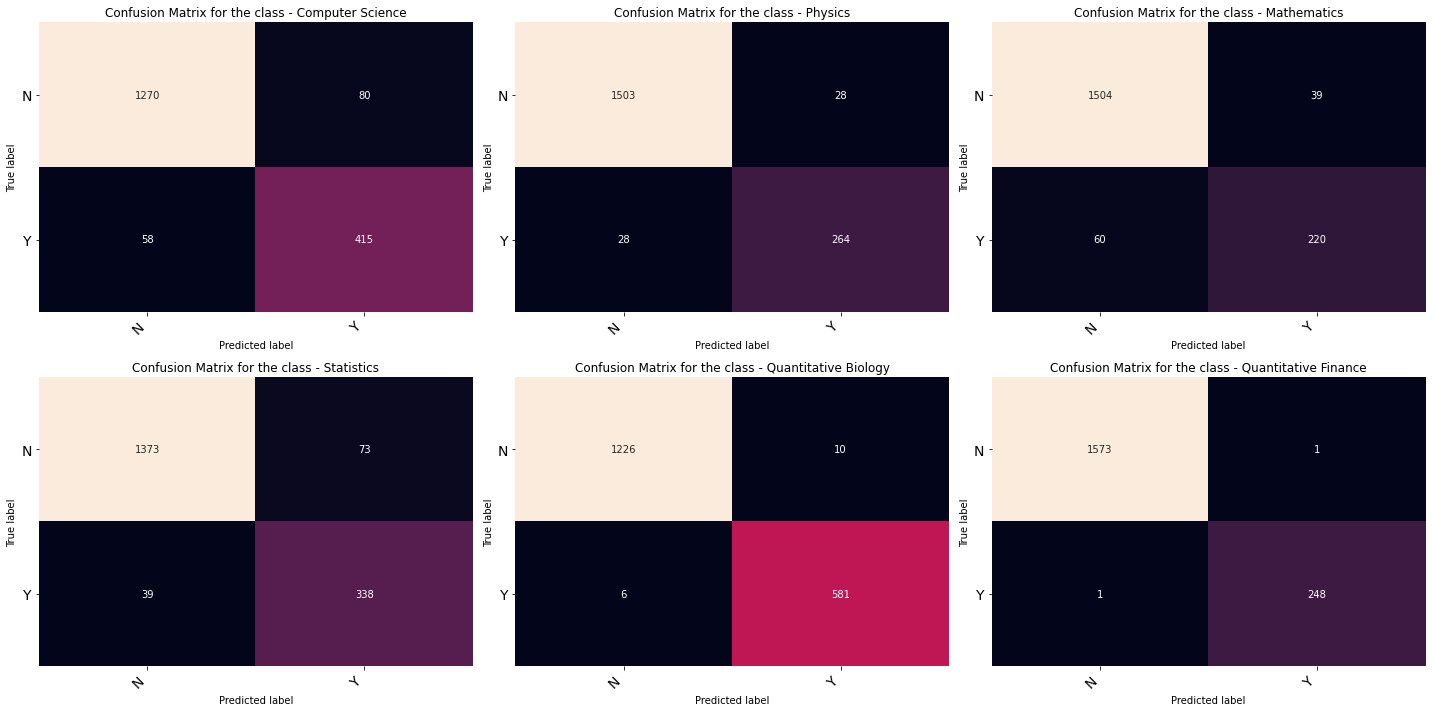

In [ ]:
utils.draw_confusion_matrices(y_preds, Ys, classes, threshold, model_names)

ROC curve for 5 Epoch TestTrain Split


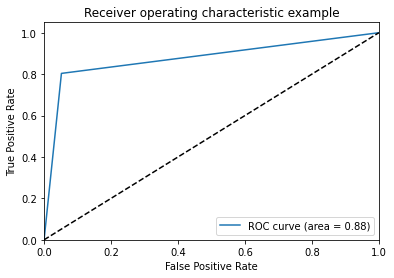

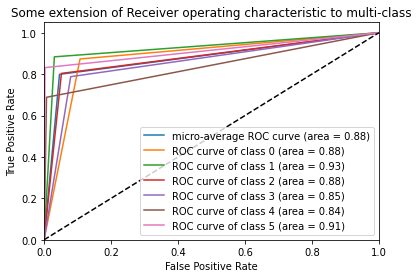

ROC curve for 10 Epoch TestTrain Split


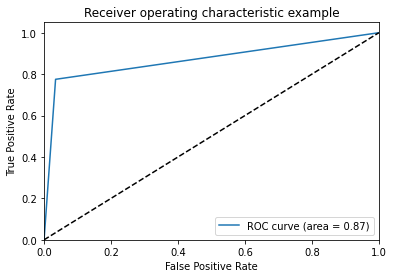

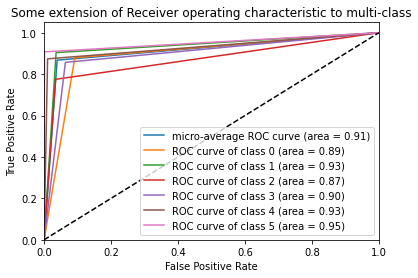

ROC curve for 4 fold KFold


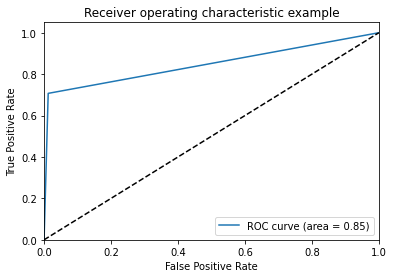

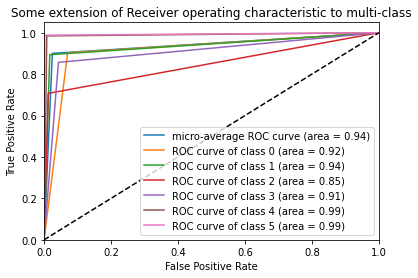

ROC curve for 8 fold KFold


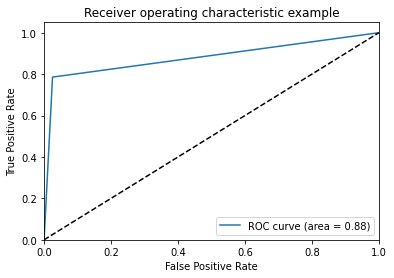

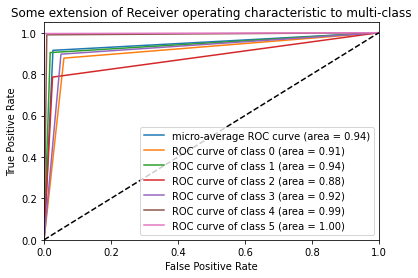

In [ ]:
utils.draw_rocs(y_preds, Ys, classes, threshold, model_names)

In [ ]:
utils.print_classification_reports(y_preds, Ys, classes, threshold, model_names)

Classification for 5 Epoch TestTrain Split  :                        precision    recall  f1-score   support

    Computer Science       0.74      0.87      0.80       473
             Physics       0.85      0.88      0.86       292
         Mathematics       0.74      0.80      0.77       280
          Statistics       0.72      0.79      0.75       377
Quantitative Biology       0.98      0.69      0.81       587
Quantitative Finance       0.98      0.83      0.90       249

           micro avg       0.82      0.80      0.81      2258
           macro avg       0.83      0.81      0.82      2258
        weighted avg       0.84      0.80      0.81      2258
         samples avg       0.83      0.83      0.82      2258

Classification for 10 Epoch TestTrain Split  :                        precision    recall  f1-score   support

    Computer Science       0.77      0.88      0.82       473
             Physics       0.83      0.90      0.86       292
         Mathematics       0.80  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the f1-score, hamming loss it is very clear kfold is performing much better at fitting out model. Also it is clear that using 4 fold is a better idea since 8 fold will take twice as much time and is not yeilding twice the performance.

## Conclusion

The experiment has shown that a KFold training with 4 folds has given the best fit for our model.